I will try to predict the Yards by building linear regression model and interpretting the influential components of respective models. 

In [42]:
#Import necessary libraries and load the dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

In [43]:
df = pd.read_csv('/Users/Elham/NFL_Files/train.csv', low_memory=False) 
df.head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW


Let's see which variables are the quantitative variables.

In [44]:
df.describe()

,GameId,PlayId,X,Y,S,A,Dis,Orientation,Dir,NflId,...,Distance,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,DefendersInTheBox,Yards,PlayerWeight,Week,Temperature,Humidity
count,6.821540e+05,6.821540e+05,682154.000000,682154.000000,682154.000000,682154.000000,682154.000000,682131.000000,682126.000000,6.821540e+05,...,682154.000000,682154.000000,682154.000000,6.821540e+05,682132.000000,682154.000000,682154.000000,682154.000000,618508.000000,675994.000000
mean,2.017975e+09,2.017975e+13,60.036863,26.791456,2.634598,1.701739,0.278193,179.996742,180.040620,2.369743e+06,...,8.319154,11.047989,9.762570,2.446079e+06,6.910340,4.227626,253.414628,8.401587,62.010066,54.741563
std,7.844593e+05,7.844593e+09,25.499310,7.192919,1.404773,0.991380,0.145218,102.794554,106.189491,6.053648e+05,...,3.818716,10.095556,9.532945,4.833287e+05,0.985065,6.449866,48.469869,4.808791,17.071117,25.146693
min,2.017091e+09,2.017091e+13,0.660000,1.850000,0.000000,0.000000,0.000000,0.000000,0.000000,2.220000e+02,...,1.000000,0.000000,0.000000,2.340000e+02,2.000000,-15.000000,153.000000,1.000000,9.000000,0.000000
25%,2.017113e+09,2.017113e+13,39.080000,22.760000,1.520000,0.950000,0.160000,90.060000,90.150000,2.532989e+06,...,6.000000,3.000000,0.000000,2.540269e+06,6.000000,1.000000,210.000000,4.000000,50.000000,43.000000
50%,2.018101e+09,2.018101e+13,60.230000,26.800000,2.510000,1.550000,0.270000,179.640000,180.180000,2.550541e+06,...,10.000000,10.000000,7.000000,2.555224e+06,7.000000,3.000000,245.000000,8.000000,64.000000,59.000000
75%,2.019091e+09,2.019091e+13,80.990000,30.850000,3.620000,2.310000,0.390000,269.780000,270.260000,2.556445e+06,...,10.000000,17.000000,16.000000,2.558116e+06,7.000000,6.000000,305.000000,12.000000,75.000000,71.000000
max,2.019112e+09,2.019113e+13,117.650000,56.450000,9.410000,14.710000,1.390000,360.000000,360.000000,2.563364e+06,...,40.000000,57.000000,59.000000,2.563327e+06,11.000000,99.000000,380.000000,17.000000,97.000000,100.000000


The data type of the variables 'PlayerHeight' and 'WindSpeed' have to be changed to float. 

In [45]:
df["PlayerHeight"] = df["PlayerHeight"].str.replace("-", ".").astype(float)
df["PlayerHeight"].head()

0    6.0
1    6.3
2    6.3
3    6.3
4    6.0
Name: PlayerHeight, dtype: float64

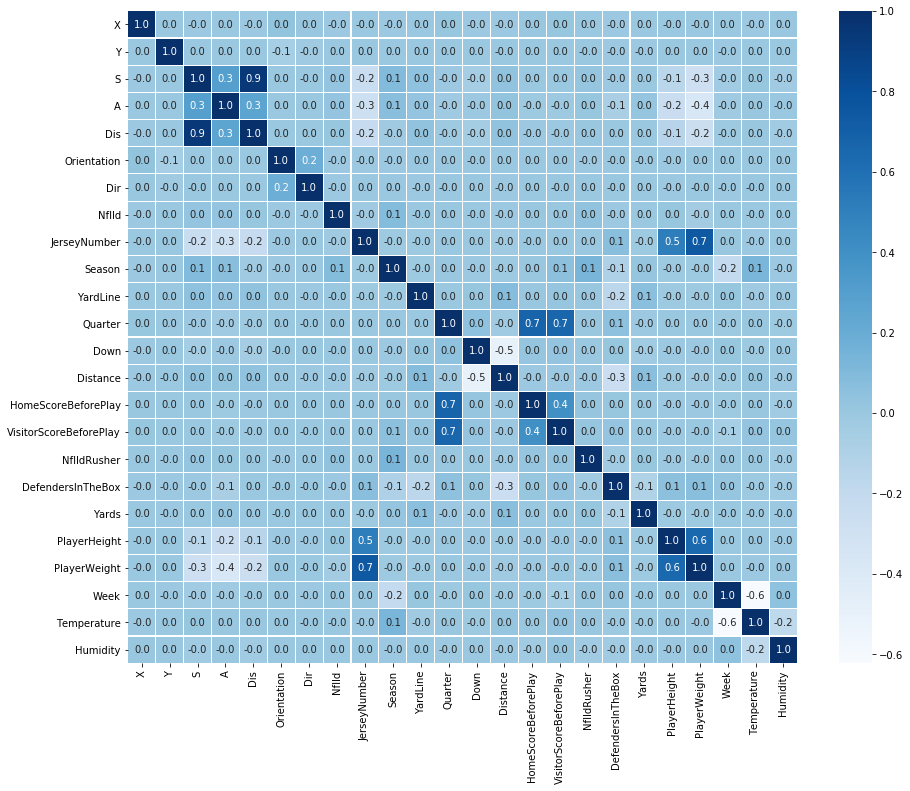

In [46]:
#Checking the correlations between the different features 

fig,ax = plt.subplots(figsize=(15,12))
corr_featurs = df.iloc[:,2:].corr()

sns.heatmap(corr_featurs, ax=ax, annot=True, linewidths=0.1, fmt='.1f', cmap="Blues")

plt.show()

Non of the quantitative variables seem to have very strong relation with 'Yards'.

First of all, I will only use the quantitative variables.

In [47]:
num_var = df[['Yards','X', 'Y', 'S', 'A', 'Dis', 'Orientation', 'Dir', 'YardLine', 
              'Quarter', 'Down', 'Distance', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay',
              'DefendersInTheBox', 'PlayerHeight', 'PlayerWeight', 'Temperature', 'Humidity']]
num_var.head()

,Yards,X,Y,S,A,Dis,Orientation,Dir,YardLine,Quarter,Down,Distance,HomeScoreBeforePlay,VisitorScoreBeforePlay,DefendersInTheBox,PlayerHeight,PlayerWeight,Temperature,Humidity
0,8,73.91,34.84,1.69,1.13,0.40,81.99,177.18,35,1,3,2,0,0,6.0,6.0,212,63.0,77.0
1,8,74.67,32.64,0.42,1.35,0.01,27.61,198.70,35,1,3,2,0,0,6.0,6.3,288,63.0,77.0
2,8,74.00,33.20,1.22,0.59,0.31,3.01,202.73,35,1,3,2,0,0,6.0,6.3,270,63.0,77.0
3,8,71.46,27.70,0.42,0.54,0.02,359.77,105.64,35,1,3,2,0,0,6.0,6.3,245,63.0,77.0
4,8,69.32,35.42,1.82,2.43,0.16,12.63,164.31,35,1,3,2,0,0,6.0,6.0,206,63.0,77.0


Let's check if there are the missing values in these variables.

In [48]:
null_values = num_var.loc[:, num_var.isnull().any()].isnull().sum().sort_values(ascending=False)

print(null_values)

Temperature          63646
Humidity              6160
Dir                     28
Orientation             23
DefendersInTheBox       22
dtype: int64


There are too many missing values in the column 'Temperature', so I decided to drop it from the model. However, I'll fill the null values in the column 'Humidity' with its mean value, and drop the rows of other three columns with null values.  

In [49]:
num_var_fillna = num_var.drop('Temperature', axis=1)#drop the column
num_var_fillna['Humidity'] = num_var['Humidity'].fillna((num_var['Humidity'].mean()))#Fill the null with mean
num_var_fillna = num_var.dropna()#Drop rows that contain null values in other three columns
num_var.head()

,Yards,X,Y,S,A,Dis,Orientation,Dir,YardLine,Quarter,Down,Distance,HomeScoreBeforePlay,VisitorScoreBeforePlay,DefendersInTheBox,PlayerHeight,PlayerWeight,Temperature,Humidity
0,8,73.91,34.84,1.69,1.13,0.40,81.99,177.18,35,1,3,2,0,0,6.0,6.0,212,63.0,77.0
1,8,74.67,32.64,0.42,1.35,0.01,27.61,198.70,35,1,3,2,0,0,6.0,6.3,288,63.0,77.0
2,8,74.00,33.20,1.22,0.59,0.31,3.01,202.73,35,1,3,2,0,0,6.0,6.3,270,63.0,77.0
3,8,71.46,27.70,0.42,0.54,0.02,359.77,105.64,35,1,3,2,0,0,6.0,6.3,245,63.0,77.0
4,8,69.32,35.42,1.82,2.43,0.16,12.63,164.31,35,1,3,2,0,0,6.0,6.0,206,63.0,77.0


In [50]:
num_var.describe()

,Yards,X,Y,S,A,Dis,Orientation,Dir,YardLine,Quarter,Down,Distance,HomeScoreBeforePlay,VisitorScoreBeforePlay,DefendersInTheBox,PlayerHeight,PlayerWeight,Temperature,Humidity
count,682154.000000,682154.000000,682154.000000,682154.000000,682154.000000,682154.000000,682131.000000,682126.000000,682154.000000,682154.000000,682154.00000,682154.000000,682154.000000,682154.000000,682132.000000,682154.000000,682154.000000,618508.000000,675994.000000
mean,4.227626,60.036863,26.791456,2.634598,1.701739,0.278193,179.996742,180.040620,28.337472,2.511336,1.51727,8.319154,11.047989,9.762570,6.910340,6.148657,253.414628,62.010066,54.741563
std,6.449866,25.499310,7.192919,1.404773,0.991380,0.145218,102.794554,106.189491,13.065655,1.141062,0.67655,3.818716,10.095556,9.532945,0.985065,0.445114,48.469869,17.071117,25.146693
min,-15.000000,0.660000,1.850000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000,2.000000,5.100000,153.000000,9.000000,0.000000
25%,1.000000,39.080000,22.760000,1.520000,0.950000,0.160000,90.060000,90.150000,19.000000,1.000000,1.00000,6.000000,3.000000,0.000000,6.000000,6.000000,210.000000,50.000000,43.000000
50%,3.000000,60.230000,26.800000,2.510000,1.550000,0.270000,179.640000,180.180000,29.000000,3.000000,1.00000,10.000000,10.000000,7.000000,7.000000,6.300000,245.000000,64.000000,59.000000
75%,6.000000,80.990000,30.850000,3.620000,2.310000,0.390000,269.780000,270.260000,39.000000,4.000000,2.00000,10.000000,17.000000,16.000000,7.000000,6.400000,305.000000,75.000000,71.000000
max,99.000000,117.650000,56.450000,9.410000,14.710000,1.390000,360.000000,360.000000,50.000000,5.000000,4.00000,40.000000,57.000000,59.000000,11.000000,6.900000,380.000000,97.000000,100.000000


In [52]:
#Select the imputed explanatory variables as X metrics
X = num_var_fillna[['X', 'Y', 'S', 'A', 'Dis', 'Orientation', 'Dir', 'YardLine', 
        'Quarter', 'Down', 'Distance', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay',
        'DefendersInTheBox', 'PlayerHeight', 'PlayerWeight', 'Humidity']] 

#The response variable vectory
y = num_var_fillna['Yards']

#Split the data as train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#instantiate and fit the model with X_train and y_train data 
lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train) 

y_test_preds = lm_model.predict(X_test)#Predict the Yards with X_test data

print(r2_score(y_test, y_test_preds))#r2_score of the actual and predicted values
print(mean_squared_error(y_test, y_test_preds))

0.015754915548686577
42.19926276259072


In [53]:
#Difference between every actual values of yards and our predicted values

preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']
preds_vs_act.head()

,actual,preds,diff
0,-1.0,2.990411,-3.990411
1,9.0,6.575985,2.424015
2,2.0,4.304605,-2.304605
3,5.0,4.710095,0.289905
4,6.0,5.805396,0.194604


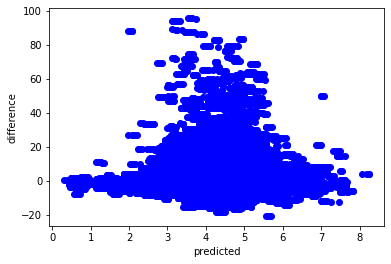

In [54]:
plt.plot(preds_vs_act['preds'], preds_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference')
plt.show()

It looks like that our model didn't predict yards very well

Let's add some catagorical variables and see how can we improve our model

In [82]:
#create a list of catagorical variables
cat_var = df.drop(['DisplayName', 'GameClock', 'WindSpeed', 'TimeHandoff', 'TimeSnap', 'PlayerBirthDate'], 
                  #Droping some variables that don't make sense to make dummy variables
                  axis=1).select_dtypes(include=['object']).copy().columns
cat_var

Index(['Team', 'PossessionTeam', 'FieldPosition', 'OffenseFormation',
       'OffensePersonnel', 'DefensePersonnel', 'PlayDirection',
       'PlayerCollegeName', 'Position', 'HomeTeamAbbr', 'VisitorTeamAbbr',
       'Stadium', 'Location', 'StadiumType', 'Turf', 'GameWeather',
       'WindDirection'],
      dtype='object')

In [87]:
#Add dummy variables to each catagorical variable

df_dum = pd.get_dummies(df, columns=['Team', 'PossessionTeam', 'FieldPosition', 'OffenseFormation',
                                     'OffensePersonnel', 'DefensePersonnel', 'PlayDirection',
                                     'PlayerCollegeName', 'Position', 'HomeTeamAbbr', 'VisitorTeamAbbr',
                                     'Stadium', 'Location', 'StadiumType', 'Turf', 'GameWeather',
                                     'WindDirection'], drop_first = True)


In [ ]:
df_dum = df_dum.drop(['Team','PossessionTeam', 'FieldPosition', 'OffenseFormation',
                      'OffensePersonnel', 'DefensePersonnel', 'PlayDirection',
                      'PlayerCollegeName', 'Position', 'HomeTeamAbbr', 'VisitorTeamAbbr',
                      'Stadium', 'Location', 'StadiumType', 'Turf', 'GameWeather',
                      'WindDirection'], axis=1)

In [96]:
df_dum = df_dum.drop(columns=['GameId', 'PlayId', 'NflId', 'NflIdRusher', 'JerseyNumber', 'WindSpeed', 'TimeHandoff', 'TimeSnap', 'PlayerBirthDate', 'Humidity'])

df_dum.head()

,X,Y,S,A,Dis,Orientation,Dir,DisplayName,Season,YardLine,...,WindDirection_W,WindDirection_W-NW,WindDirection_W-SW,WindDirection_WNW,WindDirection_WSW,WindDirection_West,WindDirection_West Northwest,WindDirection_West-Southwest,WindDirection_from W,WindDirection_s
0,73.91,34.84,1.69,1.13,0.40,81.99,177.18,Eric Berry,2017,35,...,0,0,0,0,0,0,0,0,0,0
1,74.67,32.64,0.42,1.35,0.01,27.61,198.70,Allen Bailey,2017,35,...,0,0,0,0,0,0,0,0,0,0
2,74.00,33.20,1.22,0.59,0.31,3.01,202.73,Justin Houston,2017,35,...,0,0,0,0,0,0,0,0,0,0
3,71.46,27.70,0.42,0.54,0.02,359.77,105.64,Derrick Johnson,2017,35,...,0,0,0,0,0,0,0,0,0,0
4,69.32,35.42,1.82,2.43,0.16,12.63,164.31,Ron Parker,2017,35,...,0,0,0,0,0,0,0,0,0,0


In [99]:
df_dum = df_dum.drop(['Yards','X', 'Y', 'S', 'A', 'Dis', 'Orientation', 'Dir', 'YardLine', 
              'Quarter', 'Down', 'Distance', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay',
              'DefendersInTheBox', 'PlayerHeight', 'PlayerWeight', 'Temperature', 'Humidity'], axis=1)

#Drop the columns that are already in num_var

In [101]:
df_result = pd.concat([df_dum, num_var], axis=1, join='inner') #merge the dummy columns df_dum with quantitative columns num_var
df_result.shape

(682154, 907)

In [107]:
df_result = df_result.iloc[:,~df_result.columns.duplicated()] #Drop duplicated columns

In [117]:
df_result.describe()

,Temperature,Team_home,PossessionTeam_ATL,PossessionTeam_BLT,PossessionTeam_BUF,PossessionTeam_CAR,PossessionTeam_CHI,PossessionTeam_CIN,PossessionTeam_CLV,PossessionTeam_DAL,...,YardLine,Quarter,Down,Distance,HomeScoreBeforePlay,VisitorScoreBeforePlay,DefendersInTheBox,PlayerHeight,PlayerWeight,Humidity
count,618508.000000,682154.0,682154.000000,682154.000000,682154.000000,682154.000000,682154.000000,682154.000000,682154.000000,682154.000000,...,682154.000000,682154.000000,682154.00000,682154.000000,682154.000000,682154.000000,682132.000000,682154.000000,682154.000000,675994.000000
mean,62.010066,0.5,0.029251,0.034960,0.031638,0.028864,0.031219,0.027703,0.029058,0.033734,...,28.337472,2.511336,1.51727,8.319154,11.047989,9.762570,6.910340,6.148657,253.414628,54.741563
std,17.071117,0.5,0.168511,0.183678,0.175035,0.167426,0.173909,0.164122,0.167969,0.180545,...,13.065655,1.141062,0.67655,3.818716,10.095556,9.532945,0.985065,0.445114,48.469869,25.146693
min,9.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000,2.000000,5.100000,153.000000,0.000000
25%,50.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19.000000,1.000000,1.00000,6.000000,3.000000,0.000000,6.000000,6.000000,210.000000,43.000000
50%,64.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,29.000000,3.000000,1.00000,10.000000,10.000000,7.000000,7.000000,6.300000,245.000000,59.000000
75%,75.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,39.000000,4.000000,2.00000,10.000000,17.000000,16.000000,7.000000,6.400000,305.000000,71.000000
max,97.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,50.000000,5.000000,4.00000,40.000000,57.000000,59.000000,11.000000,6.900000,380.000000,100.000000


In [119]:
df_result = df_result.dropna()#Drop the rows with null values
df_result.shape

(618454, 902)

In [120]:
y = df_result['Yards'] #Select the explanatory variables as X metrics
X = df_result.drop(['Yards'], axis=1) #Response variables as y

In [121]:
#Split the data as train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#instantiate and fit the model with X_train and y_train data 
lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train) 

y_test_preds = lm_model.predict(X_test)#Predict the Yards with X_test data

print(r2_score(y_test, y_test_preds))#r2_score of the actual and predicted values
print(mean_squared_error(y_test, y_test_preds))

-6.585780570772361e+23
2.8236370106711457e+25


The result of the model looks not good.
Let's try reduce the number of features.

In [ ]:
reduce_X = X.iloc[:, np.where((X.sum() > 10) == True)[0]] #Reduce the X metrics
reduce_X.shape

In [132]:
#Split the reduced data as train and test groups
X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = .30, random_state=42)

#instantiate and fit the model with X_train and y_train data
lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train) 

        
y_test_preds = lm_model.predict(X_test) #Predict the Yards with reduced X_test data

print(r2_score(y_test, y_test_preds)) #r2_score of the actual and predicted values
print(mean_squared_error(y_test, y_test_preds)) 

0.03183973265261264
41.50963023693256


It seems that the model have got better with reduced X metrics.
I'll use different cutoffs to train the model with diffent reduced X metrics using the way I learned from: https://github.com/jjrunner/stackoverflow/blob/master/PredictSalary.ipynb

In [139]:
r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    
#reduce X with differnet cutoffs

cutoffs = [1000, 500, 100, 50, 30, 25, 20, 15, 10, 5]

for cutoff in cutoffs:
    reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]#Reduce the X metrics
    num_feats.append(reduce_X.shape[1])
    
    #Split the reduced data as train and test groups
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = 0.30, random_state=42)
    
    #instantiate and fit the model with X_train and y_train data
    lm_model = LinearRegression(normalize=True) 
    lm_model.fit(X_train, y_train)
   
    #Predict the Yards with reduced X_test and X_train data
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)
   
    #append the calculated r2 values with different number of features
    r2_scores_test.append(r2_score(y_test, y_test_preds))
    r2_scores_train.append(r2_score(y_train, y_train_preds))
    results[str(cutoff)] = r2_score(y_test, y_test_preds)

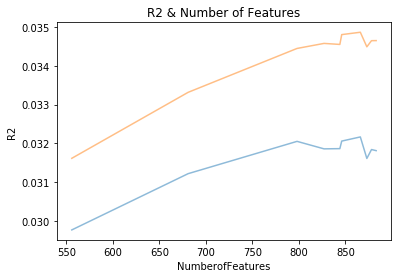

In [140]:
#Plot number of features and respective gained r2 values

plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
plt.xlabel('NumberofFeatures')
plt.ylabel('R2')
plt.title('R2 & Number of Features')

plt.show()

The better r2 can be gained by reducing the number of features around 850, but the model still is not able to pridict the response very well, maybe it's due to the too many noises in the data. 